In [70]:
from __future__ import print_function

In [71]:
!curl https://data.cityofnewyork.us/api/views/46g3-savk/rows.csv?accessType=DOWNLOAD > school.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 20.4M    0 20.4M    0     0   783k      0 --:--:--  0:00:26 --:--:--  839k39k    0     0   634k      0 --:--:--  0:00:02 --:--:--  634k


In [72]:
import os
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/pl1840/PUIdata


In [73]:
!mv school.csv $PUIDATA

In [74]:
!ls $PUIDATA

income.csv  school.csv


In [75]:
import pandas as pd
school = pd.read_csv("%s/school.csv"%os.getenv("PUIDATA"))

In [76]:
school.head(8)

,School,Date,SchoolYear,Enrolled,Present,Absent,Released
0,01M015,20150909,20152016,177,159,18,0
1,01M015,20150910,20152016,173,159,14,0
2,01M015,20150911,20152016,174,164,10,0
3,01M015,20150916,20152016,172,159,13,0
4,01M015,20150917,20152016,172,165,7,0
5,01M015,20150918,20152016,172,161,11,0
6,01M015,20150921,20152016,172,160,12,0
7,01M015,20150922,20152016,172,164,8,0


In [77]:
school.tail(3)

,School,Date,SchoolYear,Enrolled,Present,Absent,Released
561696,79X695,20170623,20162017,281,120,38,123
561697,79X695,20170627,20162017,274,111,42,121
561698,79X695,20170628,20162017,273,90,56,127


In [78]:
school.columns

Index(['School', 'Date', 'SchoolYear', 'Enrolled', 'Present', 'Absent',
       'Released'],
      dtype='object')

In [79]:
school.size

3931893

In [80]:
school_2c = school[['Enrolled','Absent']]

In [81]:
school_2c.head()

,Enrolled,Absent
0,177,18
1,173,14
2,174,10
3,172,13
4,172,7


In [82]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


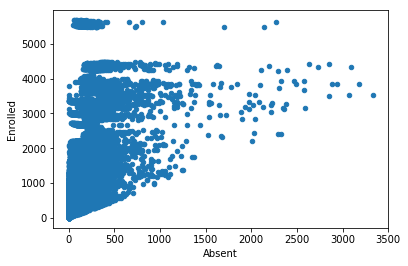

In [83]:
school_2c.plot(x="Absent", y="Enrolled", kind='scatter')

Figure 1: Number of student absent against number of student enrolled in daily scale from 2015/09/09 to 2017/06/28. These two variables do not display a strong correlation. No matter how many students enrolled each day, the number of student absent are under 500, on average.

In [84]:
url = "https://data.cityofnewyork.us/resource/enzt-5z6v.json"

In [85]:
df = pd.read_json(url)

In [86]:
df.head(3)

,absent,date,enrolled,present,released,school,schoolyear
0,18,20150909,177,159,0,01M015,20152016
1,14,20150910,173,159,0,01M015,20152016
2,10,20150911,174,164,0,01M015,20152016


In [92]:
df.drop(['present','released','school','schoolyear'],axis=1)

,absent,date,enrolled
0,18,2015-09-09,177
1,14,2015-09-10,173
2,10,2015-09-11,174
3,13,2015-09-16,172
4,7,2015-09-17,172
5,11,2015-09-18,172
6,12,2015-09-21,172
7,8,2015-09-22,172
8,18,2015-09-25,175
9,4,2015-09-28,175


In [88]:
df["date"]=df["date"].apply(lambda x: pd.to_datetime(x,format='%Y%m%d'))

Text(0,0.5,'Number')

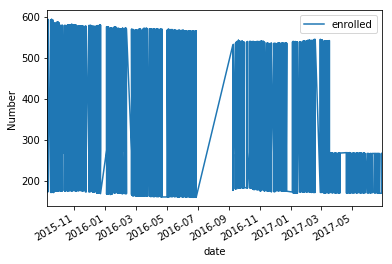

In [98]:
ax = df.plot(x='date', y='enrolled');
ax.set_ylabel("Number")

Figure 2: number of student enrolled each day as a function of time between 2015/09/09 to 2017/03/17. No significant trend observed. Note that after March 2017, the number of student enrolled each day declined siginificantly.

Text(0,0.5,'Number')

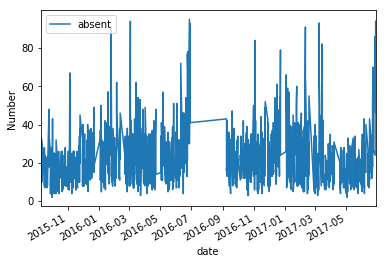

In [97]:
ax = df.plot(x='date', y='absent')
ax.set_ylabel("Number")

Figure 3: number of student absent each day as a function of time bewteen 2015/09/09 to 2017/03/17. No significant trend observed. Note that between July 2016 to September 2016, the number of absent student kept nearly the same.